In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica Neue') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 22})
mss=120

In [24]:
rats=[20382,24101,21012,22295,20630,22098,23783,24116]
path="../data_bool/"
#df = pd.DataFrame()
df=pd.read_json(path+"Rat_"+str(22098)+"_BOOLop_resrel_data.json")

In [25]:
# for ratid in rats:
#     tmp_df=pd.read_json(path+"Rat_"+str(ratid)+"_BOOLop_resrel_data.json")
#     df = pd.concat([df,tmp_df], ignore_index=True)

In [26]:
df_AND=df.query('OP == "AND"')
df_OR=df.query('OP == "OR"')
df_XOR=df.iloc[df.query('OP == "OR"').index + 1 ]
assert np.array_equal(df_OR.U1_GID.values,df_XOR.U1_GID.values)
assert np.array_equal(df_OR.U2_GID.values,df_XOR.U2_GID.values)

In [27]:
quant='OHK'
quant_lab='MSR (a.u.)'
qMAX=0.3
qMIN=0.25
#figname='../figures/Fig2A.png'
#figname2='../../../../Apps/Overleaf/Project_Relevance_of_CA1_SUB/img/Fig2A.png'

In [28]:
quant_OR_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_OR.U1_GID.values,df_OR.U2_GID.values)))}
quant_AND_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_AND.U1_GID.values,df_AND.U2_GID.values)))}

OR_list=[]
for (a,b) in df_OR[[quant,"U1_GID","U2_GID","Nspikes","U_LOC"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_OR_vals[b.values[1]],
            'U2_'+quant:quant_OR_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_OR_vals[b.values[1]],quant_OR_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4]
          };
    OR_list.append(row)
list_of_OR=pd.DataFrame(OR_list)

AND_list=[]
for (a,b) in df_AND[[quant,"U1_GID","U2_GID","Nspikes","U_LOC"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_AND_vals[b.values[1]],
            'U2_'+quant:quant_AND_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_AND_vals[b.values[1]],quant_AND_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4]
          };
    AND_list.append(row)
list_of_AND=pd.DataFrame(AND_list)
list_of_AND[quant] = list_of_AND[quant].replace(0, np.nan)

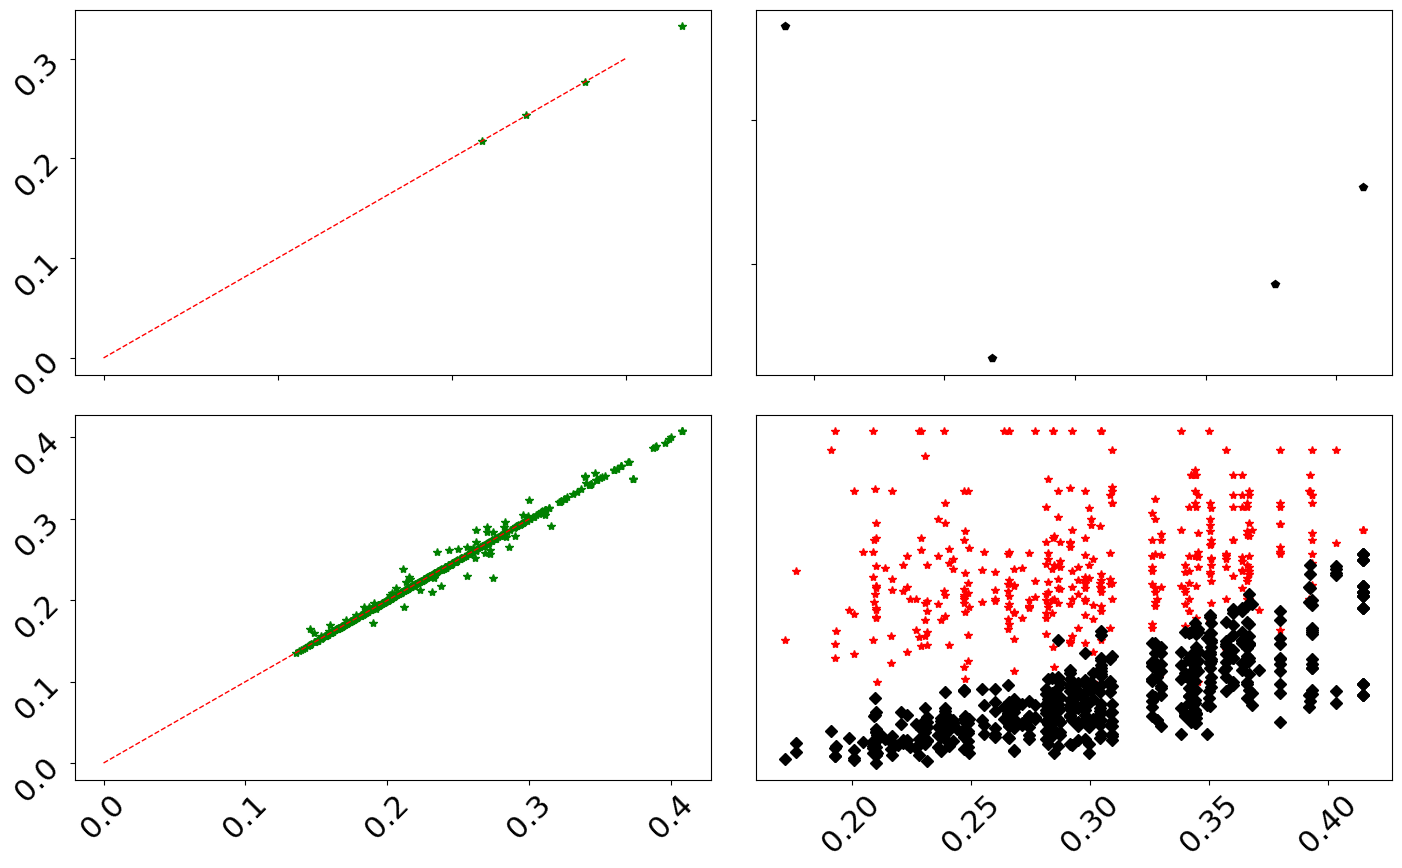

In [33]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(17, 10))

ax1.plot(df_OR.query('U_LOC=="CA1"')[quant].values,df_XOR.query('U_LOC=="CA1"')[quant].values,'g*')
ax1.plot([0, qMAX], [0, qMAX], 'r--', lw=1) ## Diagonal Line

#ax1.set_xlim([qMIN,qMAX]);ax1.set_ylim([qMIN,qMAX])
ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=45)

ax3.plot(df_OR.query('U_LOC=="SUB"')[quant].values,df_XOR.query('U_LOC=="SUB"')[quant].values,'g*')
ax3.plot([0, qMAX], [0, qMAX], 'r--', lw=1) ## Diagonal Line
#ax3.set_xlim([qMIN,qMAX]);ax2.set_ylim([qMIN,qMAX])
ax2.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=False,rotation=0)


ax2.plot(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')[quant].values,'r*')
ax2.plot(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')[quant].values,'kp')
#ax2.plot([0, qMAX], [0, qMAX], 'r--', lw=1) ## Diagonal Line#
ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=45)


ax4.plot(list_of_AND.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB"')[quant].values,'r*')
ax4.plot(list_of_OR.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB"')[quant].values,'kD')
#ax4.plot([0, qMAX], [0, qMAX], 'r--', lw=1) ## Diagonal Line#
ax4.tick_params(axis='both', which='both', bottom=True, top=False, left=False, right=False, labelbottom=True,labelleft=False,rotation=45)





plt.subplots_adjust(wspace=0.07,hspace=0.11)

(0.25, 0.3)

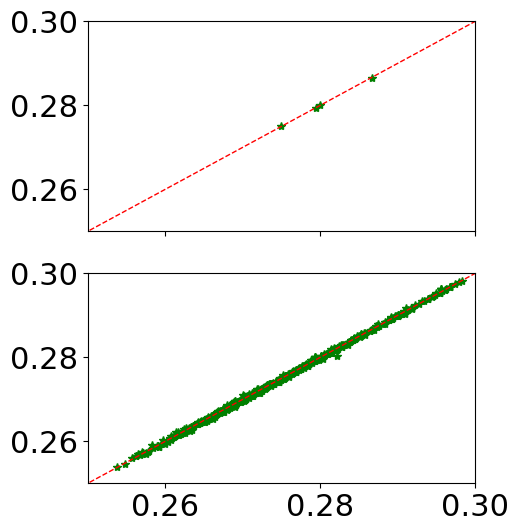

In [14]:

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5, 6),sharex=True,sharey=True)

quant='MSR'
quant_lab='MSR (a.u.)'
qMAX=0.3
qMIN=0.25
#figname='../figures/Fig2A.png'
#figname2='../../../../Apps/Overleaf/Project_Relevance_of_CA1_SUB/img/Fig2A.png'



ax1.plot(df_OR.query('U_LOC=="CA1"')[quant].values,df_XOR.query('U_LOC=="CA1"')[quant].values,'g*')
ax1.plot([0, qMAX], [0, qMAX], 'r--', lw=1) ## Diagonal Line
ax1.set_xlim([qMIN,qMAX]);ax1.set_ylim([qMIN,qMAX])

ax2.plot(df_OR.query('U_LOC=="SUB"')[quant].values,df_XOR.query('U_LOC=="SUB"')[quant].values,'g*')
ax2.plot([0, qMAX], [0, qMAX], 'r--', lw=1) ## Diagonal Line
ax2.set_xlim([qMIN,qMAX]);ax2.set_ylim([qMIN,qMAX])

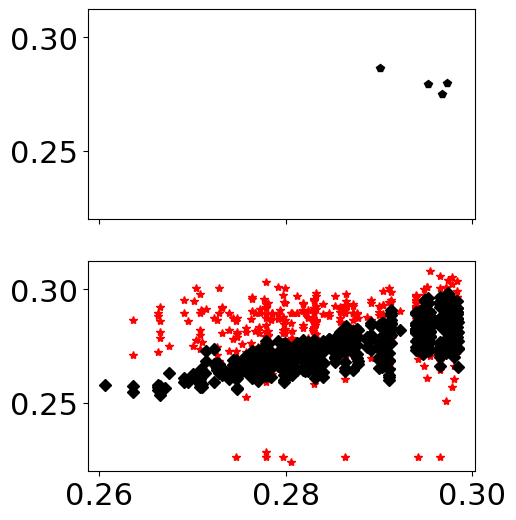

In [15]:

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5, 6),sharex=True,sharey=True)

quant='MSR'
quant_lab='MSR (a.u.)'
qMAX=0.3
qMIN=0.25
#figname='../figures/Fig2A.png'
#figname2='../../../../Apps/Overleaf/Project_Relevance_of_CA1_SUB/img/Fig2A.png'



ax1.plot(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')[quant].values,'r*')
ax1.plot(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')[quant].values,'kp')
#ax1.plot([0, qMAX], [0, qMAX], 'r--', lw=1) ## Diagonal Line#
#ax1.set_xlim([qMIN,qMAX]);ax1.set_ylim([qMIN,qMAX])

ax2.plot(list_of_AND.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB"')[quant].values,'r*')
ax2.plot(list_of_OR.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB"')[quant].values,'kD')